Edge ('S3A', 'S2C'): Curvature = 0.293
Edge ('S2C', 'S1E'): Curvature = -0.231
Edge ('S2C', 'R1K'): Curvature = 0.500
Edge ('S1E', 'TC'): Curvature = -2.316
Edge ('TC', 'R1K'): Curvature = -0.971
Edge ('TC', 'R1M'): Curvature = -0.932
Edge ('R1K', 'R2N'): Curvature = -3.894
Edge ('R2N', 'R3R'): Curvature = 1.500
Edge ('R2N', 'R3S'): Curvature = -0.699
Edge ('R3S', 'R3T'): Curvature = 1.368
Edge ('S3B', 'S2D'): Curvature = 0.775
Edge ('S2D', 'S1E'): Curvature = 0.367
Edge ('S1L', 'TC'): Curvature = -1.864
Edge ('R1M', 'R2O'): Curvature = -0.156
Edge ('R2O', 'R3T'): Curvature = 0.586
Edge ('S3G', 'S2I'): Curvature = 1.053
Edge ('S2I', 'S1L'): Curvature = -2.231
Edge ('S2I', 'R1M'): Curvature = -3.398
Edge ('S3H', 'S2I'): Curvature = 0.660


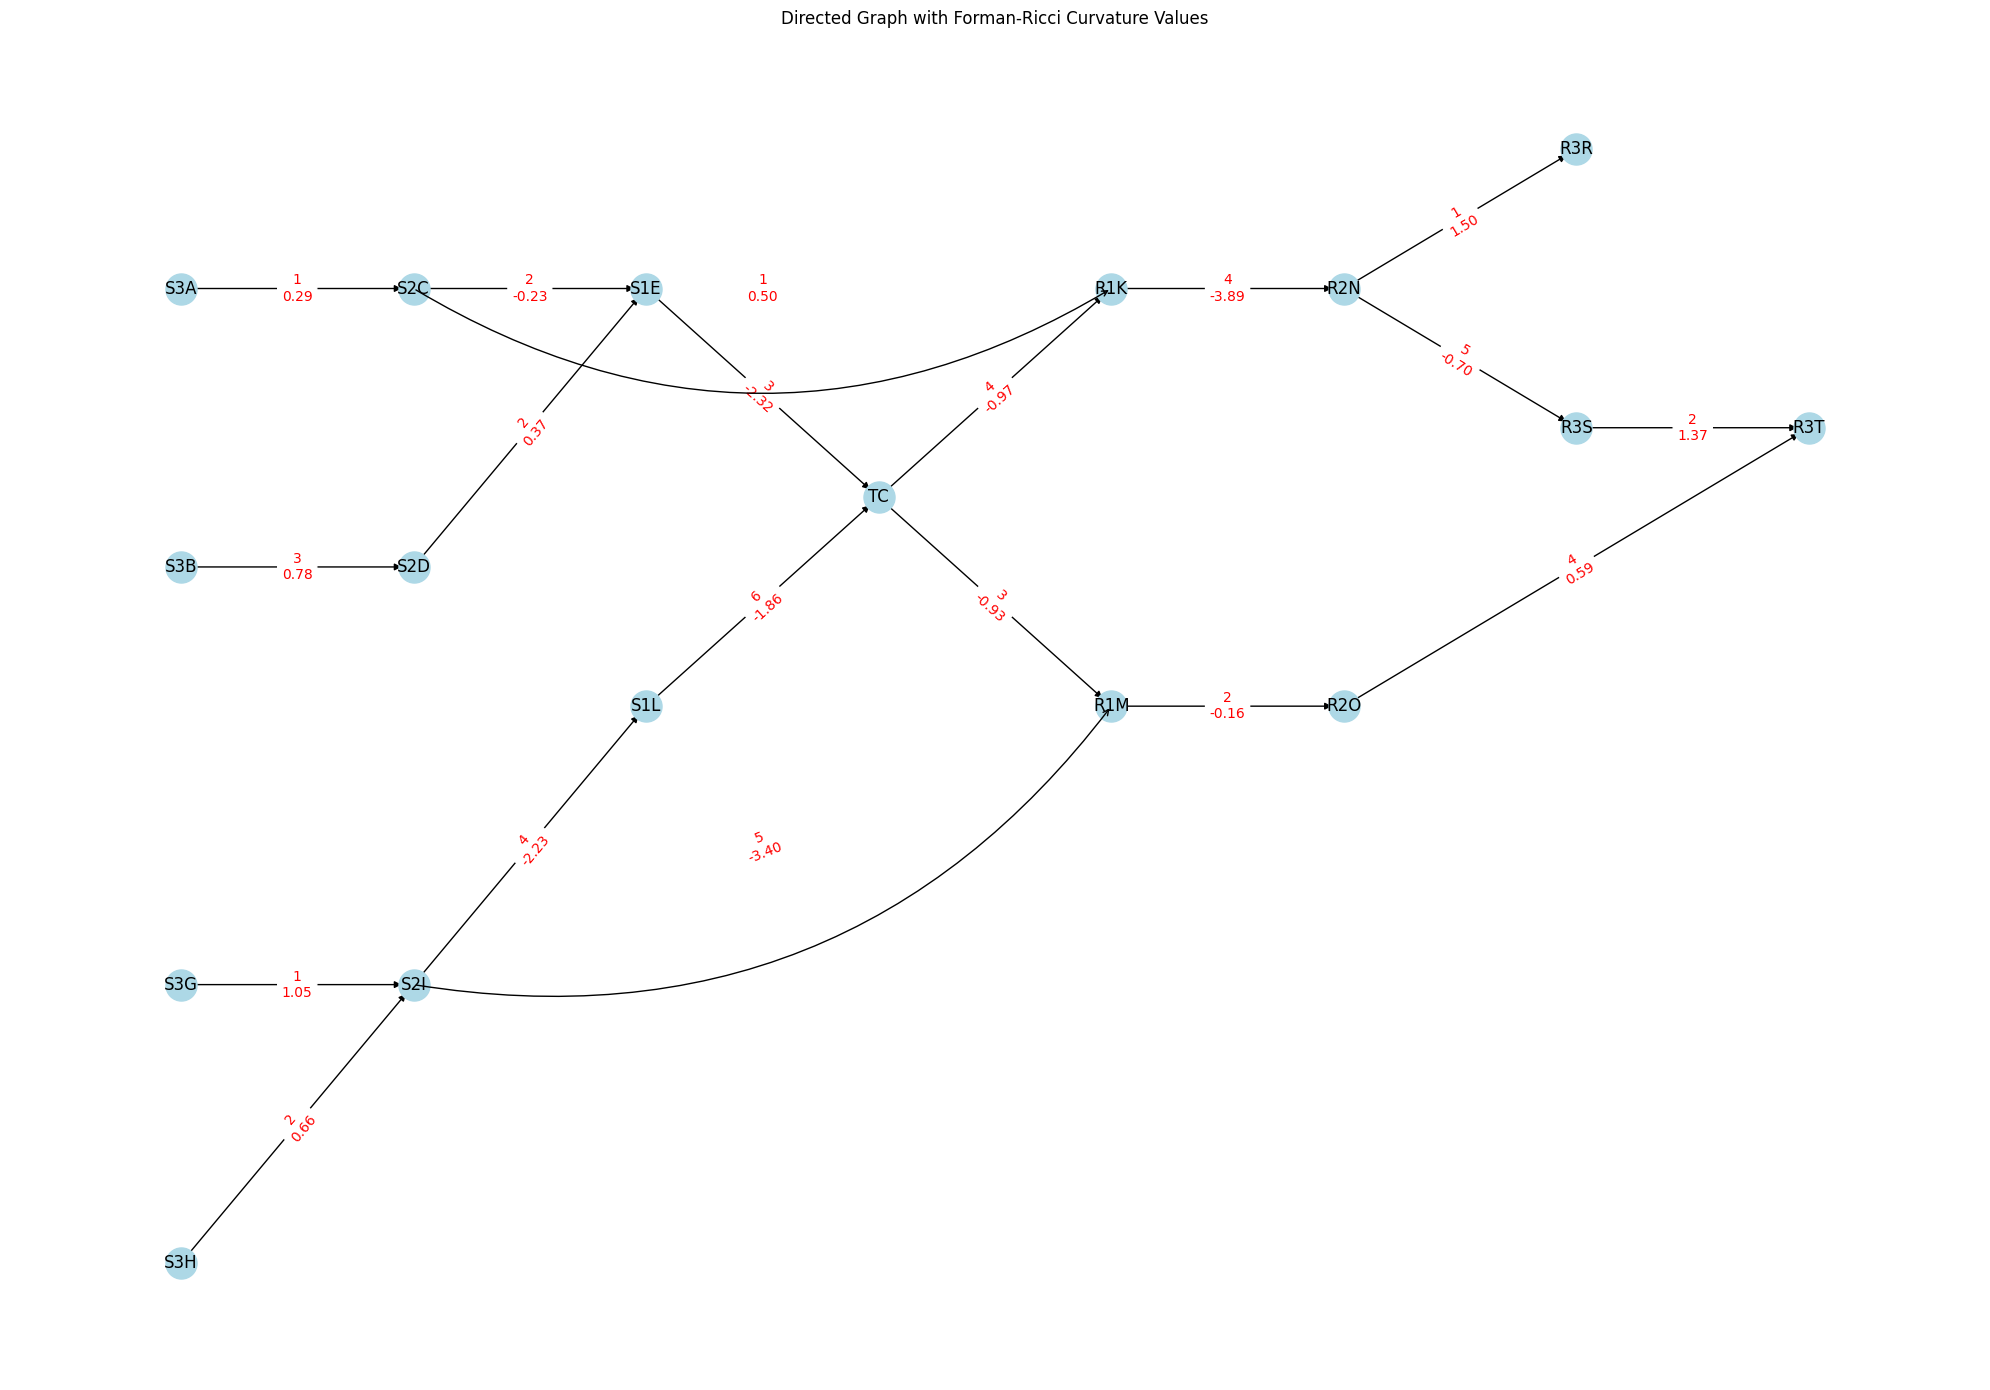

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Adding nodes
nodes = ['S3A', 'S2C', 'S1E', 'TC', 'R1K', 'R2N', 'R3R', 'R3S', 'R3T',
         'S3B', 'S2D', 'S1L', 'R1M', 'R2O',
         'S3G', 'S2I',
         'S3H']

G.add_nodes_from(nodes)

# Adding edges with weights (direction is from left to right)
edges_with_weights = [
    ('S3A', 'S2C', 1), ('S2C', 'S1E', 2), ('S1E', 'TC', 3), ('TC', 'R1K', 4), ('R1K', 'R2N', 4),
    ('R2N', 'R3R', 1), ('R2N', 'R3S', 5), ('R3S', 'R3T', 2),
    ('S3B', 'S2D', 3), ('S2D', 'S1E', 2),
    ('S1L', 'TC', 6), ('TC', 'R1M', 3), ('R1M', 'R2O', 2), ('R2O', 'R3T', 4),
    ('S3G', 'S2I', 1), ('S3H', 'S2I', 2), ('S2I', 'S1L', 4),
    ('S2C', 'R1K', 1), ('S2I', 'R1M', 5)
]

G.add_weighted_edges_from(edges_with_weights)

# Defining function to compute Forman-Ricci curvature for directed networks
def forman_ricci_curvature_directed(G, edge):
    """
    Compute the Forman-Ricci curvature for a directed edge.

    For a directed edge e=(v1,v2), the formula fir calculating curvature values is:
    F(e) = w_e * ((w_v1/w_e - sum(w_v1/sqrt(w_e*w_ei))) + (w_v2/w_e - sum(w_v2/sqrt(w_e*w_ej))))

    where:
    - w_e is the weight of the edge e
    - w_v1, w_v2 are weights of nodes v1, v2 (we'll use 1 for all nodes)
    - w_ei are weights of edges incoming to v1 (excluding e)
    - w_ej are weights of edges outgoing from v2 (excluding e)
    """
    v1, v2 = edge
    w_e = G[v1][v2]['weight']

    # For this implementation, we'll use node weight = 1 for all nodes
    w_v1 = w_v2 = 1

    # Get incoming edges to v1 (excluding the current edge)
    incoming_v1 = [(u, v1) for u, v in G.in_edges(v1) if (u, v) != edge]
    incoming_weights_sum = 0
    for u, _ in incoming_v1:
        w_ei = G[u][v1]['weight']
        incoming_weights_sum += w_v1 / np.sqrt(w_e * w_ei)

    # Get outgoing edges from v2 (excluding the current edge)
    outgoing_v2 = [(v2, v) for u, v in G.out_edges(v2) if (u, v) != edge]
    outgoing_weights_sum = 0
    for _, v in outgoing_v2:
        w_ej = G[v2][v]['weight']
        outgoing_weights_sum += w_v2 / np.sqrt(w_e * w_ej)

    # Calculating the Forman-Ricci curvature
    curvature = w_e * ((w_v1/w_e - incoming_weights_sum) + (w_v2/w_e - outgoing_weights_sum))

    return curvature

# Calculating curvature for each edge
edge_curvatures = {}
for edge in G.edges():
    curvature = forman_ricci_curvature_directed(G, edge)
    edge_curvatures[edge] = curvature

# Printing curvature values
for edge, curvature in edge_curvatures.items():
    print(f"Edge {edge}: Curvature = {curvature:.3f}")

# Creating a visual representation with curvature values
plt.figure(figsize=(20, 14))
pos = {
    'S3A': (0, 4), 'S2C': (2, 4), 'S1E': (4, 4), 'TC': (6, 2.5), 'R1K': (8, 4), 'R2N': (10, 4),
    'R3R': (12, 5), 'R3S': (12, 3), 'R3T': (14, 3),
    'S3B': (0, 2), 'S2D': (2, 2),
    'S1L': (4, 1), 'R1M': (8, 1), 'R2O': (10, 1),
    'S3G': (0, -1), 'S2I': (2, -1),
    'S3H': (0, -3)
}

# Plotting the network
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_labels(G, pos)

# Drawing the edges with curvature values as labels
curved_edges = [('S2C', 'R1K'), ('S2I', 'R1M')]  # Edges that should be drawn with a curve
straight_edges = [e for e in G.edges() if e not in curved_edges]

# Drawing the straight edges
nx.draw_networkx_edges(G, pos, edgelist=straight_edges, arrows=True)

# Drawing the curved edges
for edge in curved_edges:
    x1, y1 = pos[edge[0]]
    x2, y2 = pos[edge[1]]
    plt.annotate("",
                xy=(x2, y2), xycoords='data',
                xytext=(x1, y1), textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.3", color='black'))

# Adding edge labels with weights and curvatures
edge_labels = {}
for u, v, data in G.edges(data=True):
    edge_labels[(u, v)] = f"{data['weight']}\n{edge_curvatures[(u, v)]:.2f}"

# Adjusting label positions for curved edges
label_pos = pos.copy()
for edge in curved_edges:
    u, v = edge
    label_pos[u] = (pos[u][0], pos[u][1] + 0.1)
    label_pos[v] = (pos[v][0], pos[v][1] + 0.1)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Directed Graph with Forman-Ricci Curvature Values")
plt.axis('off')
plt.tight_layout()
plt.show()